# Tiesinė regresija

<br>

---

### Dėmesio!
Statistikos ir matematikos čia neaptarinėsime, tik patį modelio veikimo principą, labai paviršutiniškai. Šios paskaitos yra orientuotos į rezultatą, o ne teoriją. Kam įdomu, pasistudijuokite savarankiškai.

### Mašininis mokymąsis
Mašininis mokymasis (Machine Learning) yra dirbtinio intelekto atšaka, automatizuojanti analitinio modelio kūrimą. Jis naudoja neuroninius tinklus, statistinius, fizikos metodus, siekdamas duomenyse atrasti paslėptas įžvalgas, kai tiksliai negalima pasakyti, kur ieškoti ar ką daryti. Nuo įprasto programavimo skiriasi tuo, kad kad žmogus paduoda duomenis, atsakymus ir gauna taisykles, kurios vėliau gali būti naudojamos naujiems duomenims apdoroti. Kai tuo tarpu klasikiniame programavime, žmogus paduoda ir taisykles ir duomenis.


![](https://littleml.files.wordpress.com/2019/03/residuals-1.png?w=497)

Tiesinės regresijos veikimo principas - mūsų modelis stengsis nubrėžti tarp taškų liniją taip, kad iki jų būtų mažiausia įmanoma atstumų kvadratų suma. Vėliau, prognozuojant naujas reikšmes, jis remsis ta linija. Žinoma, esant daugiau negu dviems kintamiesiems, kaip šiuo atveju, x ir y, procesai pasidaro sudėtingi ir painūs, todėl turėkite omenyje, kad tai tik labai primityvus pavyzdys.

Pradėkime nuo bibliotekų importavimo:

In [99]:
import pandas as pd
import seaborn as sns

In [100]:
%matplotlib inline

Dirbsime su tuo pačiu automobilių DF, mėginsime apmokyti modelį, kuris atspės automobilio degalų suvartojimą

In [101]:
mpg = sns.load_dataset('mpg')

In [102]:
mpg.head(60)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


### Duomenų sutvarkymas

Patikrinkime, ar nėra tuščių reikšmių:

In [103]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


matome, kad yra problemų su horsepower stulpeliu.

In [104]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


Galimi sprendimo variantai - kadangi reikšmių kiekis sąntykinai nedidelis - galime jas tiesiog ištrinti. Arba pamėginti jas surasti internete. Arba pakeisti vidurkiu visų reikšmių. Arba pakeisti vidurkiu reikšmių su panašiais kitais tech parametrais. Turime nuspręsti, kiek preciziški norėsime būti :)

Internete surastos reikšmės:
* ford pinto - 75, 
* ford maverick - 105, 
* renault lecar deluxe - 51, 
* ford mustang cobra - 120, 
* renault 18i - 73, 
* amc concord dl - 82

Tiesiog jas pakeičiame rankiniu būdu:

In [105]:
mpg.loc[32, 'horsepower'] = 75
mpg.loc[126, 'horsepower'] = 105
mpg.loc[330, 'horsepower'] = 51
mpg.loc[336, 'horsepower'] = 120
mpg.loc[354, 'horsepower'] = 73
mpg.loc[374, 'horsepower'] = 82

patikrinkime dar kartą:

In [106]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [107]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Kadangi statistiniams modeliams nepatinka *string* reikšmės, pakalbėkime apie pandas.get_dummies() metodą. Turime kategorines reikšmes stulpelyje origin - usa, japan, europe. Metodas get_dummies() padės mums jas išskirstyti į tris atskirus stulpelius, kuriuose 1 reikš True, 0 - False.  

In [108]:
dummies = pd.get_dummies(mpg['origin'])

In [109]:
dummies.head()

,europe,japan,usa
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


Prijunkime gautą rezultatą prie mūsų pagrindinės lentelės:

In [110]:
data = pd.concat([mpg, dummies], axis=1)

Patikrinkime, ar atitinka gamintojai pagal šalį:

In [111]:
data.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,europe,japan,usa
388,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion,False,False,True
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l,False,False,True
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt,False,True,False
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2,False,False,True
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro,False,False,True
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,False,False,True
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,False,False,True


Ištrinkime mums nereikalingus stulpelius su string reikšmėmis. 

In [112]:
data.drop(['origin', 'name'], axis=1, inplace=True)

In [113]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


### Duomenų paruošimas tiesinės regresijos modeliui

atskirkime lentelėje mūsų 'target'(stulpelis, kurio reikšmes prognozuos modelis) duomenis nuo likusios dalies:

In [114]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'europe', 'japan', 'usa'],
      dtype='object')

In [115]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'europe', 'japan', 'usa']]
# Features

In [116]:
y = data['mpg'] # Target 

Iš scikit-learn importuokime train_test_split metodą. Jis paskirstys duomenis mokymui ir testavimui. 

In [117]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,8,307.0,130.0,3504,12.0,70,False,False,True
1,8,350.0,165.0,3693,11.5,70,False,False,True
2,8,318.0,150.0,3436,11.0,70,False,False,True
3,8,304.0,150.0,3433,12.0,70,False,False,True
4,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,False,False,True
394,4,97.0,52.0,2130,24.6,82,True,False,False
395,4,135.0,84.0,2295,11.6,82,False,False,True
396,4,120.0,79.0,2625,18.6,82,False,False,True


In [118]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split

Sklearn biblioteką galima įsidiegti per komandą pip install scikit-learn

In [120]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33, random_state=42)

Šį momentą svarbu suprasti:

**.train_test_split()** grąžina mums 4 reikšmes:

* X_train - duomenys, iš kurių modelis mokysis.
* X_test - duomenys, kuriais "maitinsime" modelį, kai jį testuosime
* y_train - atsakymai, iš kurių modelis taip pat mokysis
* y_test - atsakymai, kuriuos modelis turės atspėti.

parametras **test_size** šiuo atveju nurodo, kad testavimui bus panaudoti 33% medžiagos. **random_state** - reikalingas tam, kad kaskartą, kai bus leidžiamas train_test_split() metodas, gautume tas pačias atsitiktines eilutes.

### Modelio sukūrimas ir apmokymas

In [121]:
from sklearn.linear_model import LinearRegression

Duokime savo modeliui mokymosi duomenis:

In [122]:
reg = LinearRegression().fit(X_train, y_train)

Valio, kintamąjame *reg* yra mūsų apmokytas modelis :) Pažiūrėkime, kokios jo prognozės.

In [123]:
pred = reg.predict(X_test)

In [124]:
pred

array([32.5807764 , 29.11531912, 20.82468337, 16.81042998, 12.53671407,
       26.89224642, 27.46096913,  9.71898846, 17.0760993 , 21.5306433 ,
       12.55239646, 35.97375981, 24.45309969, 13.64179325, 23.33981127,
        6.42582008, 29.07341977, 25.16152699, 16.28333751, 36.13277466,
       24.85161985, 18.54208742, 28.42495262, 28.10143028, 14.80888168,
       35.98685651, 26.59945344, 24.37634664, 21.67995077,  8.83362446,
       27.96549245, 36.05109578, 20.56982898, 25.76405355, 34.06919842,
       11.88189052, 22.51551402, 21.69716135, 12.45688148, 27.88145573,
       25.93878775, 28.4408266 , 21.35409858,  7.28439335, 24.25967981,
       34.75785888, 27.84102343, 25.38400728, 23.61343313, 28.72129644,
       21.97440896, 33.44984508, 32.52325432, 10.88379546, 27.44117061,
        9.91298837, 19.76560359, 29.76634903, 22.4060054 , 20.17165045,
       16.02114488, 31.77642227, 23.4149797 , 21.7584608 , 20.55449373,
       25.16026886, 24.6024376 , 31.80307564, 27.49403129, 12.71

### Rezultatų interpretavimas

*pred* yra numPy array, paverskime jį į pandas seriją:

In [125]:
spejimai = pd.Series(data=pred, name='Spėjimas')

Sukurkime lentelę, kurioje matytųsi spėjimai ir tikrosios reikšmės:

In [126]:
res = pd.concat([y_test.reset_index(), spejimai], axis=1)[['mpg', 'Spėjimas']]

In [127]:
res.head(50)

,mpg,Spėjimas
0,33.0,32.580776
1,28.0,29.115319
2,19.0,20.824683
3,13.0,16.810430
4,14.0,12.536714
5,27.0,26.892246
6,24.0,27.460969
7,13.0,9.718988
8,17.0,17.076099
9,21.0,21.530643


Patikrinkime mūsų modelio tikslumą procentais:

In [128]:
reg.score(X_test, y_test)

0.8463742656811793

<br>
<br>

# Užduotys:

---

Užduočių sprendimui mums reikalingi kai kurie įrankiai ir duomenys.<br>

Siekinat sklandaus darbo rezultato, kai kurie įrankiai šioje temoje pasikartoja.

In [130]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [131]:
%matplotlib inline

In [133]:
fish = pd.read_csv('Fish.csv')

In [134]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<br>

### Pirma užduotis:

Turime lentelę su 7 žuvų rūšim, bei įvairiais jų išmatavimais. Vienas iš jų yra svoris - tai bus mūsų target stulpelis.<br>

<b>Sukurkite tiesinės regresijos modelį, kuris pagal kitus lentelės stulpelius spėlios žuvies svorį.</b><br>

Išsiaiškinkite, ar yra trūkstamų reikšmių, atsispausdinkite keletą diagramų ir histogramų, patyrinėkite tendencijas ir koreliacijas. Kilus neaiškumams, remkitės paskaitos medžiaga.<br>

Sėkmės!

In [135]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<Axes: xlabel='Species', ylabel='count'>

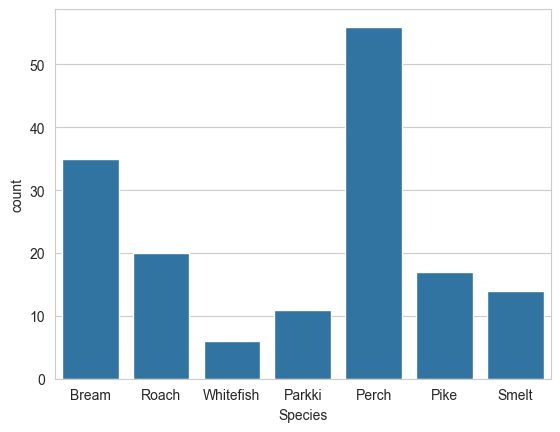

In [136]:
sns.set_style('whitegrid')
sns.countplot(x=fish['Species'])

<Axes: xlabel='Species', ylabel='Weight'>

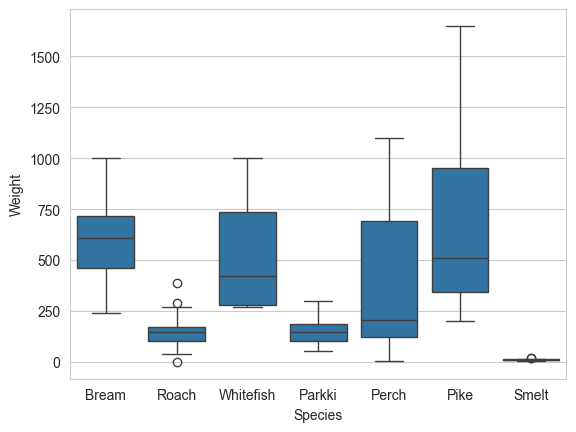

In [137]:
sns.boxplot(x='Species', y='Weight', data=fish)

<Axes: >

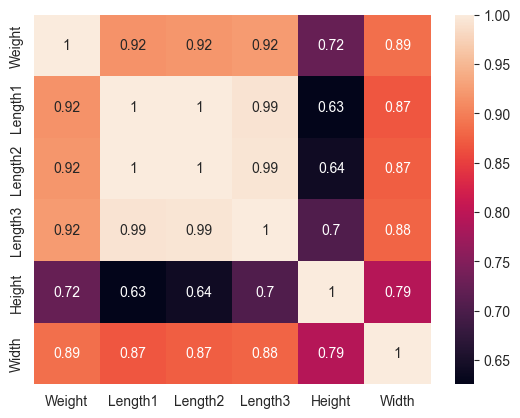

In [138]:
sns.heatmap(fish.corr(numeric_only=True), annot=True)

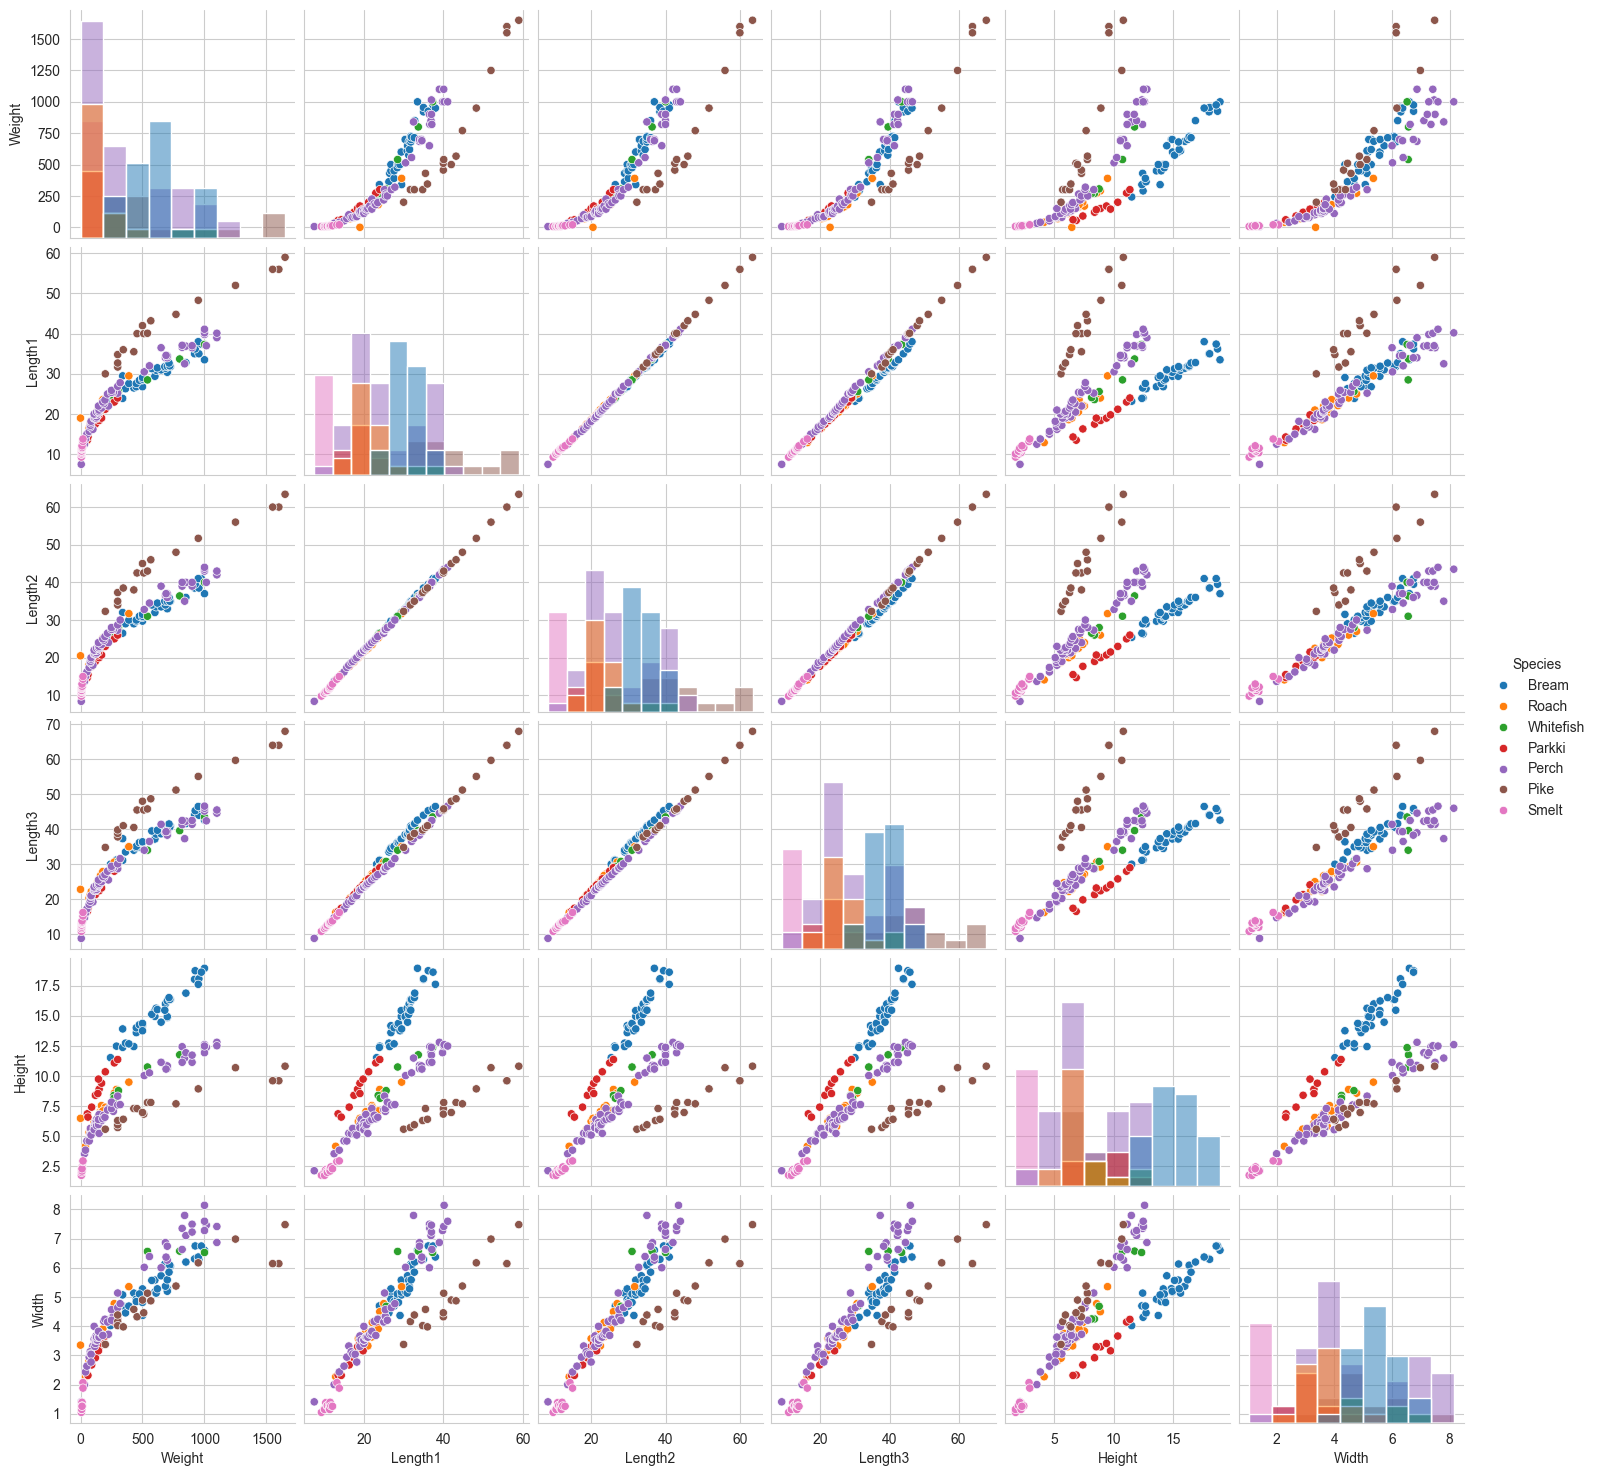

In [139]:
sns.pairplot(fish, hue='Species', diag_kind='hist')

In [140]:
dummies = pd.get_dummies(fish['Species'])
data = pd.concat([fish, dummies], axis=1)
data.drop('Species', axis=1, inplace=True)

In [141]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [142]:
data.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [143]:
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']]
y = data['Weight']

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [146]:
reg.score(X_test, y_test)

0.9405192628555377

In [147]:
preds = reg.predict(X_test)

In [148]:
new_column = pd.Series(data=preds, name='Pred_Weight')

In [149]:
new_column.head()

0     25.241369
1      0.595421
2    208.449859
3    331.665261
4    215.482994
Name: Pred_Weight, dtype: float64

In [150]:
y_test.head()

78      78.0
155     13.4
128    200.0
55     270.0
94     150.0
Name: Weight, dtype: float64

In [151]:
res = pd.concat([y_test.reset_index(), new_column], axis=1)[['Weight', 'Pred_Weight']]

In [152]:
res

,Weight,Pred_Weight
0,78.0,25.241369
1,13.4,0.595421
2,200.0,208.449859
3,270.0,331.665261
4,150.0,215.482994
5,1000.0,753.929942
6,7.0,-72.458507
7,180.0,253.698723
8,188.0,259.678480
9,1250.0,1186.485729
